<a href="https://colab.research.google.com/github/sreehari59/Polar-Embedding/blob/main/4_list_comparison_with_Hofstede.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# This is to load file from google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
def polar_list(list):
  
  right_polar_list = []
  left_polar_list = []
  for i in range(0,len(list)):
    
    left_polar_list.append(list[i][0])
    right_polar_list.append(list[i][1])

  return left_polar_list,right_polar_list



In [ ]:
def alphabetical_list_creation(list):
  new_list = []
  
  for i in range(0,len(list)):
    
    if list[i][0] < list[i][1]:
      val = list[i][0]+"-"+list[i][1]
      new_list.append(val)
      
    else:
      val = list[i][1]+"-"+list[i][0]
      new_list.append(val)
      
  return new_list

In [ ]:
def company_count(company_df,input_list,polar_embedding):  

  # we then find the number of companies grouped on the basis of location
  for i in input_list:
    print(i)
    j = i.replace("-","")
    subset_df2 = polar_embedding[polar_embedding[j] < 0]
    company_inclined_to_left_polar_df1 = subset_df2['Location'].value_counts()
    left_polar = i.split("-")[0]
    company_inclined_to_left_polar_df1 = pd.DataFrame({'Country':company_inclined_to_left_polar_df1.index, left_polar :company_inclined_to_left_polar_df1.values})
    company_df=pd.merge(company_df, company_inclined_to_left_polar_df1, how='left',on='Country')    
    company_df[left_polar] = round( company_df[left_polar] / company_df.iloc[:,1] * 100)

    subset_df1 = polar_embedding[polar_embedding[j] > 0]
    company_inclined_to_right_polar_df1 = subset_df1['Location'].value_counts()
    right_polar = i.split("-")[1]
    company_inclined_to_right_polar_df1 = pd.DataFrame({'Country':company_inclined_to_right_polar_df1.index, right_polar :company_inclined_to_right_polar_df1.values})
    company_df=pd.merge(company_df, company_inclined_to_right_polar_df1, how='left',on='Country')    
    company_df[right_polar] = round( company_df[right_polar] / company_df.iloc[:,1] * 100)


  company_df = company_df.fillna(0)

  # We are considering only the countries if the numberof companies in the country is over 3
  company_df = company_df[company_df['Total Count'] > 3]

  return company_df

In [ ]:
def polar_ranking(polar_list,total_score,ranking,company_df):
  total_sum=0
  total_sum_list=[]
  polar_ranking_list = []
  polar_index=0
  for index,row in company_df.iterrows():  
    
    for i in polar_list:
      
      total_sum = total_sum + (row[i])
    #print(company_df.iloc[index,2:])  
    total_sum_list.append(total_sum/len(polar_list))
    polar_ranking_list.append(index+1)
    total_sum = 0

  company_df[total_score] = total_sum_list
  company_df= company_df.sort_values(by=[total_score],ascending=False)
  company_df[ranking] = polar_ranking_list

  return company_df

In [ ]:
list_new = [
('make', 'break'), ('cameraman', 'playwright'), ('mystical', 'factual'), ('promotional', 'defamation'), ('iconic', 'unknown'),
('leaders', 'subordinates'), ('leadership', 'subordinated'), ('party', 'commands'), ('opposition', 'command'), ('led', 'reassigned'),
('hierarchical','non-hierarchical'),
('superior','equal'),
('leader','subordinate'),
('inequality','equality'),
('autocrat','democrat'),




('lop', 'secure'), ('shah', 'poor'), ('pneumatic', 'solid'), ('interpret', 'misinterpret'), ('confer', 'refuse'),
('originality', 'communities'), ('uniqueness', 'organizations'), ('creativity', 'neighborhood'), ('individualism', 'outreach'), ('spontaneity', 'local'),
('individuality','community'),
('self-interest','harmony'),
('tasks','relationships'),
('individual','groups'),
('universalism','particularism'),

('try', 'abstain'), ('fatalistic', 'freewill'), ('knowledgeable', 'uninformed'), ('confine', 'free'), ('fan', 'warm'),
('achievements', 'loving'), ('accomplishment', 'nurturing'), ('excellence', 'cared'), ('accomplishments', 'care'), ('award', 'sick'),
('achievement', 'support'),
('competitive', 'caring'),
('assertive', 'submissive'),
('ambitious', 'unambitious'),
('sucess','cooperation'),


('innovator', 'follower'), ('sensory', 'numb'), ('hedge', 'squander'), ('arachnid', 'serpent'), ('disclose', 'secrete'),
('pragmatism', 'conceptions'), ('constructive', 'empirical'), ('principled', 'foundational'), ('practical', 'contexts'), ('sensible', 'prescriptive'),
('pragmatic','normative'),
('progress','preserve'),
('adapt','conserve'),
('developing','stable'),
('advance','retain'),

('diagnose', 'sicken'), ('intercourse', 'disconnection'), ('sensory', 'sensorial'), ('emasculate', 'strengthen'), ('metropolitan', 'rural'),
('visionary', 'disciple'), ('innovators', 'devotee'), ('inventor', 'adherent'), ('entrepreneur', 'followers'), ('pioneering', 'devout'),
('fulfillment','restriction'),
('satisfaction','limitation'),
('liberty','moderation'),
('expand','direct'),
('freedom','regulation'),

('stretcher', 'compressor'), ('amalgamate', 'separate'), ('caretaker', 'assailant'), ('caretaker', 'violator'), ('contaminate', 'sterilize'),
('simplicity', 'complexities'), ('subtlety', 'sophistication'), ('honesty', 'richness'), ('originality', 'inherent'), ('consistency', 'computational'),
('clarity','complexity'),
('clear','ambiguous'),
('certain','uncertain'),
('uniformity','diversity'),
('agreement','variation')
]

In [ ]:
list_powerdistance_random =[('make', 'break'), ('cameraman', 'playwright'), ('mystical', 'factual'), ('promotional', 'defamation'), ('iconic', 'unknown')]
list_individualism_random = [('lop', 'secure'), ('shah', 'poor'), ('pneumatic', 'solid'), ('interpret', 'misinterpret'), ('confer', 'refuse')]
list_masculinity_random = [('try', 'abstain'), ('fatalistic', 'freewill'), ('knowledgeable', 'uninformed'), ('confine', 'free'), ('fan', 'warm')]
list_longterm_random = [('innovator', 'follower'), ('sensory', 'numb'), ('hedge', 'squander'), ('arachnid', 'serpent'), ('disclose', 'secrete')]
list_indulgence_random = [('diagnose', 'sicken'), ('intercourse', 'disconnection'), ('sensory', 'sensorial'), ('emasculate', 'strengthen'), ('metropolitan', 'rural')]
list_uncertainity_avoidance_random = [('stretcher', 'compressor'), ('amalgamate', 'separate'), ('caretaker', 'assailant'), ('caretaker', 'violator'), ('contaminate', 'sterilize')]

In [ ]:
list_powerdistance_similar =[('leaders', 'subordinates'), ('leadership', 'subordinated'), ('party', 'commands'), ('opposition', 'command'), ('led', 'reassigned')]
list_individualism_similar = [('originality', 'communities'), ('uniqueness', 'organizations'), ('creativity', 'neighborhood'), ('individualism', 'outreach'), ('spontaneity', 'local')]
list_masculinity_similar = [('achievements', 'loving'), ('accomplishment', 'nurturing'), ('excellence', 'cared'), ('accomplishments', 'care'), ('award', 'sick')]
list_longterm_similar = [('pragmatism', 'conceptions'), ('constructive', 'empirical'), ('principled', 'foundational'), ('practical', 'contexts'), ('sensible', 'prescriptive')]
list_indulgence_similar = [('visionary', 'disciple'), ('innovators', 'devotee'), ('inventor', 'adherent'), ('entrepreneur', 'followers'), ('pioneering', 'devout')]
list_uncertainity_avoidance_similar = [('simplicity', 'complexities'), ('subtlety', 'sophistication'), ('honesty', 'richness'), ('originality', 'inherent'), ('consistency', 'computational')]

In [ ]:
list_powerdistance =[('hierarchical','nonhierarchical'),('superior','equal'),('leader','subordinate'),('inequality','equality'),('autocrat','democrat')]
list_individualism = [('individuality','community'),('selfinterest','harmony'),('tasks','relationships'),('individual','groups'),('particularism','universalism')]
list_masculinity = [('achievement', 'support'),('competitive', 'caring'),('assertive', 'submissive'),('ambitious', 'unambitious'),('sucess','cooperation')]
list_longterm = [('pragmatic','normative'),('progress','preserve'),('adapt','conserve'),('developing','stable'),('advance','retain')]
list_indulgence = [('fulfillment','restriction'),('satisfaction','limitation'),('liberty','moderation'),('expand','direct'),('freedom','regulation')]
list_uncertainity_avoidance = [('clarity','complexity'),('clear','ambiguous'),('certain','uncertain'),('uniformity','diversity'),('agreement','variation')]

In [ ]:
# Power distance index	, Individualism index	, Masculinity index	, Uncertainty avoidance index	, Long term orientation index	, Indulgence index
hof = "Indulgence"
dimension = hof+" index"
dimension_ranking = hof+" Ranking"
left_polar_list_random,right_polar_list_random = polar_list(list_individualism_random)
left_polar_list_similar,right_polar_list_similar = polar_list(list_individualism_similar)
left_polar_list_human,right_polar_list_human = polar_list(list_individualism)


input_list_random = alphabetical_list_creation(list_individualism_random)
input_list_similar = alphabetical_list_creation(list_individualism_similar)
input_list_human = alphabetical_list_creation(list_individualism)


In [ ]:
new_df = pd.read_csv('/content/drive/MyDrive/Polar Embedding/POLAR-GloVe.csv')

fortune_500_company = pd.read_csv('/content/drive/MyDrive/Fortune Global 500 companies.csv',encoding= 'unicode_escape')
fortune_500_company['Company'] = fortune_500_company['Company'].str.lower()
fortune_500_company['Company'] = fortune_500_company['Company'].str.replace(" ","")

polar_embedding = pd.merge(fortune_500_company,new_df,how="right",left_on="Company",right_on="Unnamed: 0")

polar_embedding= polar_embedding.drop(['Rank'],axis=1) # This will drop the column Rank
polar_embedding= polar_embedding.drop(['Unnamed: 0'],axis=1) # This will drop the column Rank


# This will find the total number of companies in our data frame based on Location
total_company_list_based_on_loc = polar_embedding['Location'].value_counts()
total_company_count_df = pd.DataFrame({'Country':total_company_list_based_on_loc.index, 'Total Count':total_company_list_based_on_loc.values})
print(total_company_count_df.head())

   Country  Total Count
0      USA           52
1    Japan           18
2  Germany           12
3  Britain           10
4   France            9


In [ ]:
polar_embedding.head()

,Company,Location,equalityinequality,constructiveempirical,commandsparty,arachnidserpent,advanceretain,disconnectionintercourse,conferrefuse,breakmake,...,groupsindividual,lopsecure,particularismuniversalism,numbsensory,creativityneighborhood,developingstable,agreementvariation,computationalconsistency,equalsuperior,ledreassigned
0,walmart,USA,-0.018897,0.021014,0.121937,-0.041930,-0.006891,0.004440,-0.028261,-0.120510,...,0.175827,0.042743,-0.143230,-0.139497,-0.192266,-0.003233,0.132027,0.023336,0.050513,-0.063598
1,amazon,USA,0.005796,0.029324,0.182645,-0.010972,-0.018419,0.049235,0.037500,-0.152999,...,0.312297,0.017312,0.074182,0.024758,0.101639,0.103899,0.117606,-0.152564,-0.058432,-0.021616
2,apple,USA,0.185868,0.117666,0.049803,-0.033943,0.040875,-0.064950,0.005268,-0.090549,...,-0.075461,0.170449,-0.020021,-0.025409,0.143264,0.134552,0.142694,0.032335,-0.054447,-0.135150
3,volkswagen,Germany,-0.057064,0.055766,-0.081890,0.086065,-0.098881,-0.096168,0.021711,-0.084040,...,0.071680,0.069693,-0.053826,0.091240,-0.056250,0.103997,0.075391,-0.045570,0.118890,0.017895
4,mckesson,USA,0.080606,-0.024074,0.017754,-0.134224,-0.069881,0.032557,0.146973,-0.105029,...,0.022770,-0.095652,0.057030,-0.126235,0.010107,-0.036261,0.059961,0.048670,-0.118470,-0.035724


In [ ]:
company_df=total_company_count_df.copy()  # This make a copy of data frame

#Below lines will find the number of companies aligned to the respective left word in antonym pair
company_df = company_count(company_df,input_list_random,polar_embedding)
company_df = company_count(company_df,input_list_similar,polar_embedding)
company_df = company_count(company_df,input_list_human,polar_embedding)


#Below lines will find the total score based on the left word and final give a ranking
company_df = polar_ranking(left_polar_list_random,"Total Score Random","Polar Rank R",company_df)
company_df = polar_ranking(left_polar_list_similar,"Total Score Similar","Polar Rank S",company_df)
company_df = polar_ranking(left_polar_list_human,"Total Score Human","Polar Rank H",company_df)

lop-secure
poor-shah
pneumatic-solid
interpret-misinterpret
confer-refuse
communities-originality
organizations-uniqueness
creativity-neighborhood
individualism-outreach
local-spontaneity
community-individuality
harmony-selfinterest
relationships-tasks
groups-individual
particularism-universalism


In [ ]:
# This will dop all the word pairs from the data fram
length = len(left_polar_list_random) + len(left_polar_list_similar) + len(left_polar_list_human)
company_df.drop(company_df.iloc[:, 2:2+(length)*2], axis = 1, inplace = True)
company_df.head(7)

# This loads the Hofsted 6 dimension csv file
hofstede_df = pd.read_csv("/content/drive/MyDrive/Polar Embedding/Hofstede 6 dimensions.csv",sep=";")
hofstede_df=hofstede_df[hofstede_df.iloc[:,:]!="#NULL!" ]
hofstede_df.dropna(axis=0)

# This merge the company dataframe and Hofstede dataframe over the common column Country
merged_df = pd.merge(company_df, hofstede_df, how='left',on='Country')
merged_df.head(10)

,Country,Total Count,Total Score Random,Polar Rank R,Total Score Similar,Polar Rank S,Total Score Human,Polar Rank H,ctr,Power distance index,Individualism index,Masculinity index,Uncertainty avoidance index,Long term orientation index,Indulgence index
0,Switzerland,5,32.0,7,64.0,5,80.0,6,SWI,34,68,70,58,74,66
1,USA,52,41.0,6,46.4,6,58.0,7,USA,40,91,62,46,26,68
2,France,9,62.2,1,48.8,2,57.8,2,FRA,68,71,43,86,63,48
3,South Korea,4,55.0,2,55.0,7,55.0,5,KOR,60,18,39,85,100,29
4,Japan,18,48.8,4,54.2,4,52.2,3,JPN,54,46,95,92,88,42
5,Germany,12,46.8,5,48.2,3,48.4,4,GER,35,67,66,65,83,40
6,Britain,10,54.0,3,48.0,1,46.0,1,GBR,35,89,66,35,51,69


In [ ]:
merged_df.head(10)

,Country,Total Count,Total Score Random,Polar Rank R,Total Score Similar,Polar Rank S,Total Score Human,Polar Rank H,ctr,Power distance index,Individualism index,Masculinity index,Uncertainty avoidance index,Long term orientation index,Indulgence index
0,Switzerland,5,32.0,7,64.0,5,80.0,6,SWI,34,68,70,58,74,66
1,USA,52,41.0,6,46.4,6,58.0,7,USA,40,91,62,46,26,68
2,France,9,62.2,1,48.8,2,57.8,2,FRA,68,71,43,86,63,48
3,South Korea,4,55.0,2,55.0,7,55.0,5,KOR,60,18,39,85,100,29
4,Japan,18,48.8,4,54.2,4,52.2,3,JPN,54,46,95,92,88,42
5,Germany,12,46.8,5,48.2,3,48.4,4,GER,35,67,66,65,83,40
6,Britain,10,54.0,3,48.0,1,46.0,1,GBR,35,89,66,35,51,69


In [ ]:
ranking_list = []
for i in range(1,len(merged_df[dimension])+1):
  ranking_list.append(i)
merged_df= merged_df.sort_values(by=[dimension],ascending=False)
merged_df[dimension_ranking] = ranking_list
merged_df.head(10)

,Country,Total Count,Total Score Random,Polar Rank R,Total Score Similar,Polar Rank S,Total Score Human,Polar Rank H,ctr,Power distance index,Individualism index,Masculinity index,Uncertainty avoidance index,Long term orientation index,Indulgence index,Indulgence Ranking
6,Britain,10,54.0,3,48.0,1,46.0,1,GBR,35,89,66,35,51,69,1
1,USA,52,41.0,6,46.4,6,58.0,7,USA,40,91,62,46,26,68,2
0,Switzerland,5,32.0,7,64.0,5,80.0,6,SWI,34,68,70,58,74,66,3
2,France,9,62.2,1,48.8,2,57.8,2,FRA,68,71,43,86,63,48,4
4,Japan,18,48.8,4,54.2,4,52.2,3,JPN,54,46,95,92,88,42,5
5,Germany,12,46.8,5,48.2,3,48.4,4,GER,35,67,66,65,83,40,6
3,South Korea,4,55.0,2,55.0,7,55.0,5,KOR,60,18,39,85,100,29,7


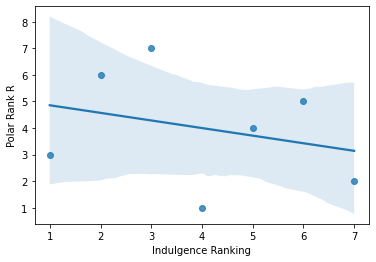

In [ ]:
import seaborn as sns
sns.regplot(x=merged_df[dimension_ranking], y=merged_df["Polar Rank R"])


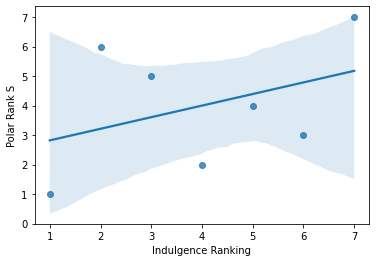

In [ ]:
sns.regplot(x=merged_df[dimension_ranking], y=merged_df["Polar Rank S"])

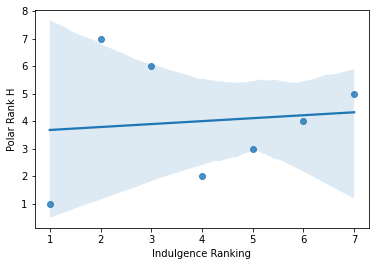

In [ ]:

sns.regplot(x=merged_df[dimension_ranking], y=merged_df["Polar Rank H"])

In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
fig = go.Figure()
fig = make_subplots(rows=2, cols=2)

fig.add_trace(go.Bar(x=merged_df["Country"] , y=merged_df[dimension].astype(int), name = "Hofstede Masculinity Score"),1,1)  
fig.add_trace(go.Bar(x=merged_df["Country"] , y=merged_df["Total Score Random"].astype(int), name = "Random Polar Score"),1,1)  

fig.add_trace(go.Bar(x=merged_df["Country"] , y=merged_df[dimension].astype(int), name = "Hofstede Masculinity Score"),1,2)  
fig.add_trace(go.Bar(x=merged_df["Country"] , y=merged_df["Total Score Similar"].astype(int), name = "Similar Polar Score"),1,2)  

fig.add_trace(go.Bar(x=merged_df["Country"] , y=merged_df[dimension].astype(int), name = "Hofstede Masculinity Score"),2,1)  
fig.add_trace(go.Bar(x=merged_df["Country"] , y=merged_df["Total Score Human"].astype(int), name = "Human Polar Score"),2,1)  

fig.show() 

In [ ]:
from sklearn.metrics import mean_absolute_error

MAE = []
MAE_of_Score = []

MAE.append(mean_absolute_error(merged_df[dimension_ranking], merged_df["Polar Rank R"]))
MAE.append(mean_absolute_error(merged_df[dimension_ranking], merged_df["Polar Rank S"]))
MAE.append(mean_absolute_error(merged_df[dimension_ranking], merged_df["Polar Rank H"]))

MAE_of_Score.append(mean_absolute_error(merged_df[dimension], merged_df["Total Score Random"]))
MAE_of_Score.append(mean_absolute_error(merged_df[dimension], merged_df["Total Score Similar"]))
MAE_of_Score.append(mean_absolute_error(merged_df[dimension], merged_df["Total Score Human"]))


In [ ]:
correlation = []

correlation.append(merged_df["Polar Rank R"].corr(merged_df[dimension_ranking]))
correlation.append(merged_df["Polar Rank S"].corr(merged_df[dimension_ranking]))
correlation.append(merged_df["Polar Rank H"].corr(merged_df[dimension_ranking]))

In [ ]:
eval_data = {"Mean Absolute Error of Rank" : MAE,
              "Correlation" : correlation,
             "Mean Absolute Error of Score" : MAE_of_Score
            }

eval_df = pd.DataFrame(eval_data, index =["Random List", "Similar List","Human Made List"])
eval_df.head()

,Mean Absolute Error of Rank,Correlation,Mean Absolute Error of Score
Random List,2.857143,-0.285714,18.542857
Similar List,1.714286,0.392857,13.114286
Human Made List,2.285714,0.107143,14.485714


In [ ]:
corr = merged_df.corr()
corr.style.background_gradient(cmap='coolwarm', axis=None, vmin=-1, vmax=1).highlight_null(null_color='#f1f1f1').set_precision(2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning:

this method is deprecated in favour of `Styler.format(precision=..)`



,Total Count,Total Score Random,Polar Rank R,Total Score Similar,Polar Rank S,Total Score Human,Polar Rank H,Indulgence Ranking
Total Count,1.00,-0.29,0.40,-0.49,0.28,-0.10,0.48,-0.39
Total Score Random,-0.29,1.00,-0.98,-0.53,-0.42,-0.65,-0.72,0.24
Polar Rank R,0.40,-0.98,1.00,0.36,0.32,0.52,0.68,-0.29
Total Score Similar,-0.49,-0.53,0.36,1.00,0.40,0.79,0.33,0.18
Polar Rank S,0.28,-0.42,0.32,0.40,1.00,0.41,0.86,0.39
Total Score Human,-0.10,-0.65,0.52,0.79,0.41,1.00,0.57,-0.14
Polar Rank H,0.48,-0.72,0.68,0.33,0.86,0.57,1.00,0.11
Indulgence Ranking,-0.39,0.24,-0.29,0.18,0.39,-0.14,0.11,1.00


In [ ]:
from scipy.stats import ttest_ind
import numpy as np

t1 = merged_df[dimension].astype(int)
t2 =  merged_df["Total Score Human"].astype(int)

t1_mean = np.mean(t1)
t2_mean = np.mean(t2)

print("t1 mean value:",t1_mean)
print("t2 mean value:",t2_mean)
t1_std = np.std(t1)
t2_std = np.std(t1)
print("t1 std value:",t1_std)
print("t2 std value:",t2_std)

ttest,pval = ttest_ind(t1,t2)

print("p-value",pval)
if pval <0.05:
  print("we reject null hypothesis")
else:
  print("we accept null hypothesis")

t1 mean value: 51.714285714285715
t2 mean value: 56.57142857142857
t1 std value: 14.78140033685467
t2 std value: 14.78140033685467
p-value 0.5230145059535751
we accept null hypothesis
